## Problem statement (Term Deposit Sale)
### Goal
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

### Resources Available

The historical data for this project is available in file
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

## Input variables:
Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account
Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*
Other attributes:
13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of contacts performed before this campaign and for this client
16. poutcome: outcome of the previous marketing campaign
Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

In [1]:
#Import all the necessary modules
import warnings
warnings.filterwarnings('ignore')

#Load Libraries
#!pip install pandas_profiling
import pandas as pd
import pandas_profiling
import numpy as np

import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

import matplotlib.pyplot as plt

%matplotlib inline

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

num_bins = 10

In [2]:
bank_df = pd.read_csv('bank-full.csv')

In [3]:
bank_df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [6]:
#size
bank_df.shape

(45211, 17)

# Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)

## 1. Univariate analysis (12 marks)
- Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
- Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.
- Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

In [7]:
bank_df.describe().transpose()

count     mean      std       min    25%    50%      75%  \
age      45,211.00    40.94    10.62     18.00  33.00  39.00    48.00   
balance  45,211.00 1,362.27 3,044.77 -8,019.00  72.00 448.00 1,428.00   
day      45,211.00    15.81     8.32      1.00   8.00  16.00    21.00   
duration 45,211.00   258.16   257.53      0.00 103.00 180.00   319.00   
campaign 45,211.00     2.76     3.10      1.00   1.00   2.00     3.00   
pdays    45,211.00    40.20   100.13     -1.00  -1.00  -1.00    -1.00   
previous 45,211.00     0.58     2.30      0.00   0.00   0.00     0.00   

                max  
age           95.00  
balance  102,127.00  
day           31.00  
duration   4,918.00  
campaign      63.00  
pdays        871.00  
previous     275.00

In [8]:
bank_df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'Target'],
      dtype=object)

In [9]:
#Number of unique in each column
bank_df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [10]:
def df_col_analysis(df):
    for name in df.columns:
        print ("----------")
        print ("Col Name: ", name)
        print ("Col type: ", df[name].dtype)
        if df[name].dtype is np.dtype('O'):
            print (df[name].value_counts())        
        else:
            print (df[name].describe())

df_col_analysis(bank_df)

----------
Col Name:  age
Col type:  int64
count   45,211.00
mean        40.94
std         10.62
min         18.00
25%         33.00
50%         39.00
75%         48.00
max         95.00
Name: age, dtype: float64
----------
Col Name:  job
Col type:  object
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
----------
Col Name:  marital
Col type:  object
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
----------
Col Name:  education
Col type:  object
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
----------
Col Name:  default
Col type:  object
no     44396
yes      815
Name: default, dtype: int64
----------
Col Name:  balance
Col type:  int64
count    45,211.00
m

In [11]:
bank_df.profile_report()

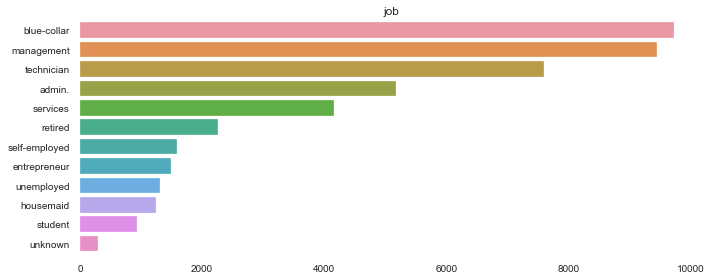

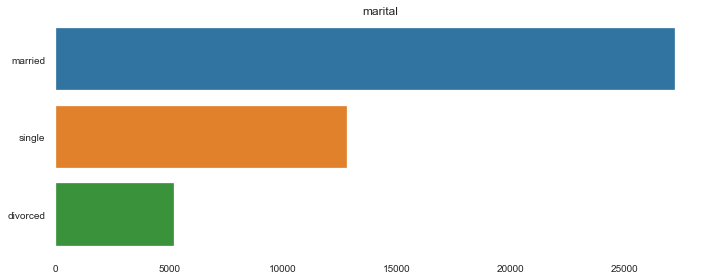

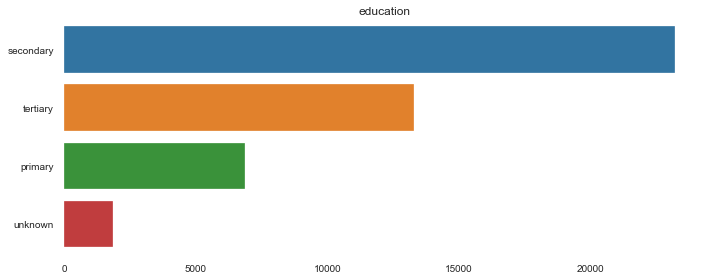

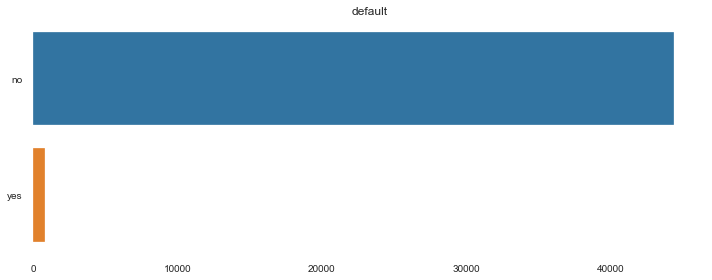

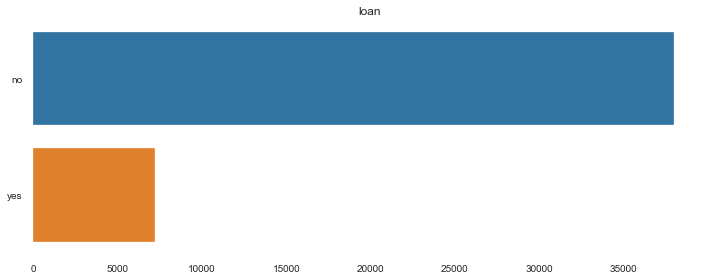

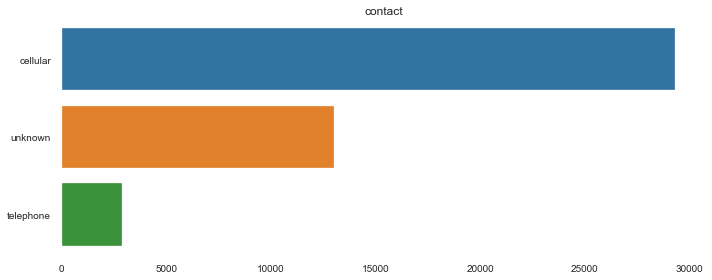

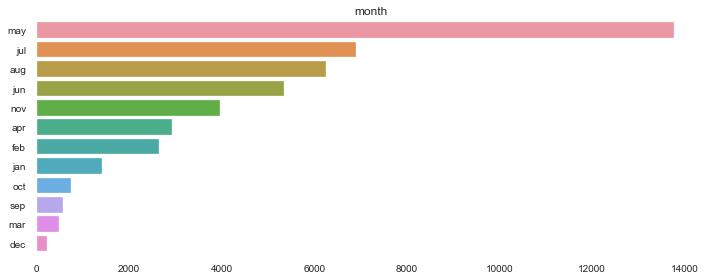

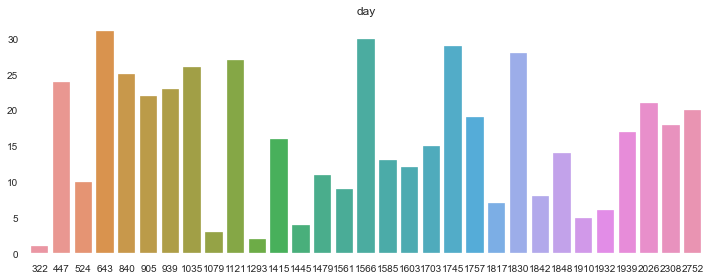

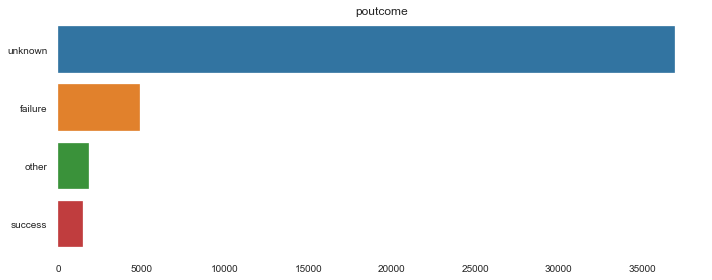

In [12]:
cont_variables=['age','balance','day','duration','campaign','pdays','previous']
bool_vars=['default','housing','loan','target']

categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day', 'poutcome']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(bank_df[col].value_counts().values, bank_df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

In [13]:

def countplot(label, dataset):
  plt.figure(figsize=(15,10))
  ax=sns.countplot(x=label, data=dataset)
  plt.show()

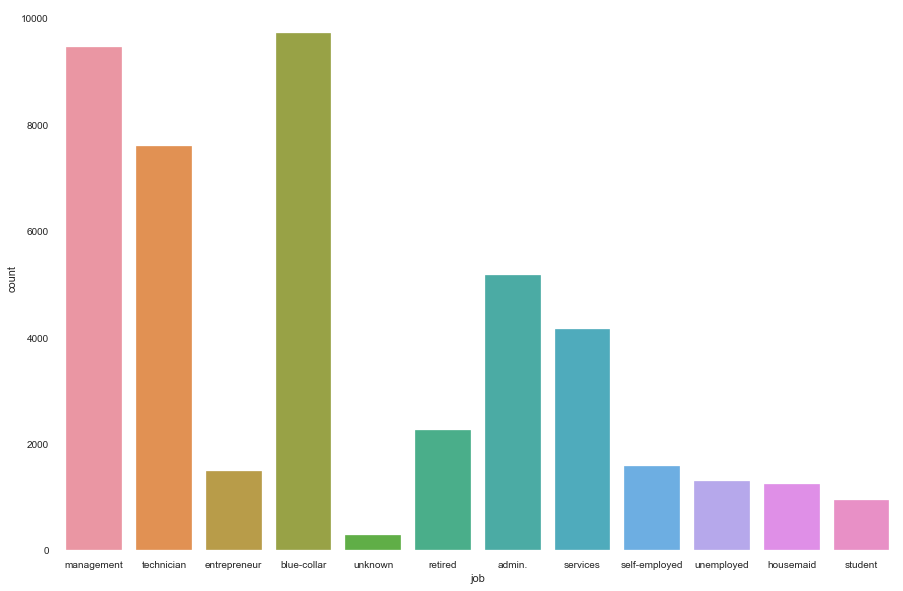

In [14]:
countplot("job", bank_df)

In [15]:
bank_df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [16]:
bank_df["Target"].value_counts()/bank_df["Target"].count()

no    0.88
yes   0.12
Name: Target, dtype: float64

#### Target Analysis: An imbalanced dataset, as 88% of the observations are No as compared to just 12 % data as Yes.

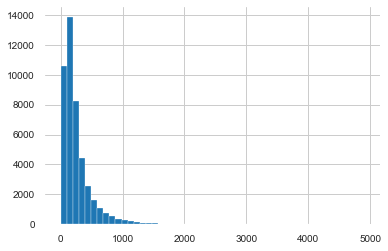

In [17]:
# Another way to plot a histogram of duration is shown below
bank_df['duration'].hist(bins=50)

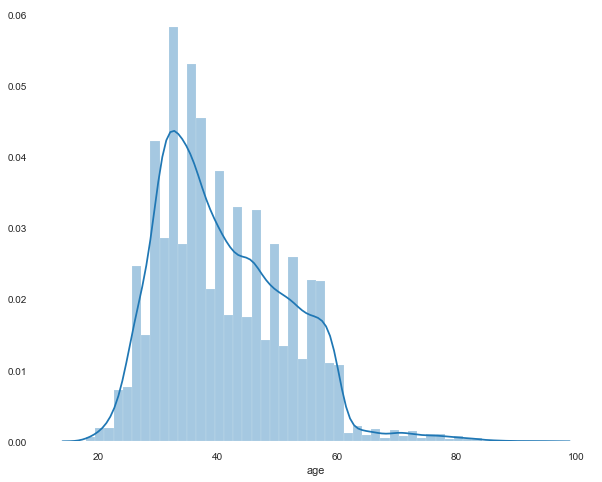

In [18]:
plt.figure(figsize=(10,8))
sns.distplot(bank_df["age"])
        

#### As we can see in the above distribution also, that most of the customers are in the age range of 30-40.

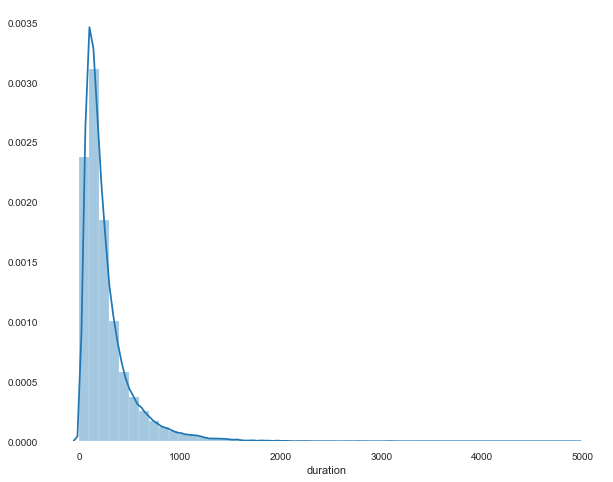

In [19]:

plt.figure(figsize=(10,8))
sns.distplot(bank_df["duration"])
plt.show()


#### This seems like a powerlaw distribution where most the values are very low and very few have high values.

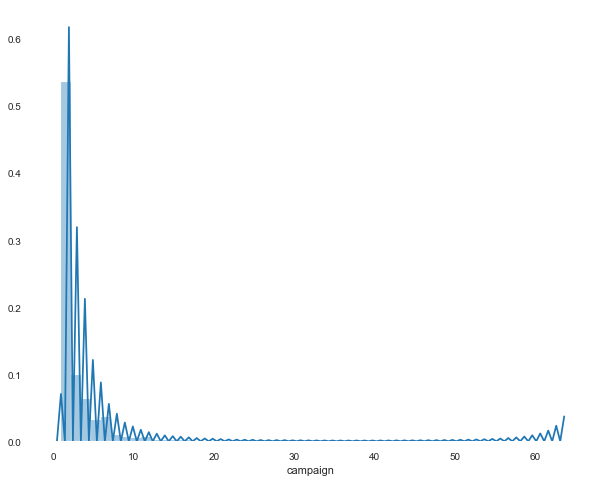

In [20]:
plt.figure(figsize=(10,8))
sns.distplot(bank_df["campaign"])
plt.show()

In [21]:
bank_df["pdays"].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

#### Most of the values are -1, which means that the most of the customers have never been contacted before.

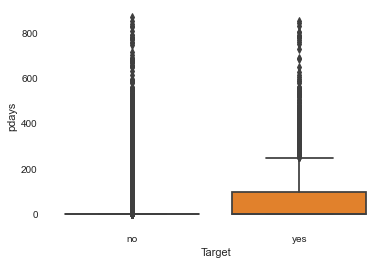

In [22]:
sns.boxplot(data=bank_df, x="Target", y="pdays")
plt.show()

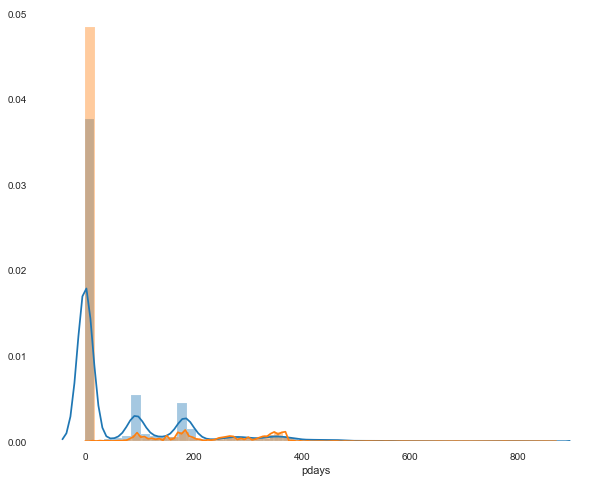

In [23]:
plt.figure(figsize=(10,8))
sns.distplot(bank_df[bank_df["Target"]=="yes"]["pdays"])
sns.distplot(bank_df[bank_df["Target"]=="no"]["pdays"])
plt.show()

In [24]:
bank_df["previous"].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

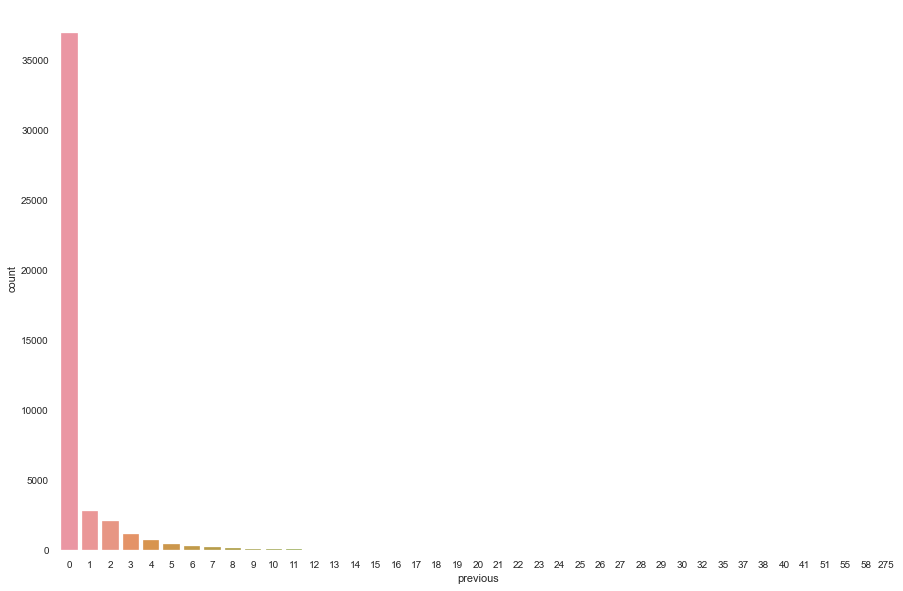

In [25]:
countplot("previous", bank_df)

In [26]:
bank_df["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

## 2. Multivariate analysis (8 marks)
- Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.
- Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

In [27]:

def barGraph(data, col1, col2 ):
    msyes=data[col1][data[col2]=='yes'].value_counts()
    msno=data[col1][data[col2]=='no'].value_counts()
    ms=pd.concat([msyes,msno],axis=1)
    ms.columns=['accepted','rejected']
    print(ms)
    ms.plot(kind='bar')

          accepted  rejected
married       2755     24459
single        1912     10878
divorced       622      4585


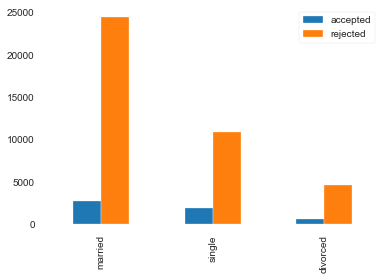

In [28]:
barGraph(bank_df, 'marital','Target')

### single people are making more deposits them married and divorced.

           accepted  rejected
secondary      2450     20752
tertiary       1996     11305
primary         591      6260
unknown         252      1605


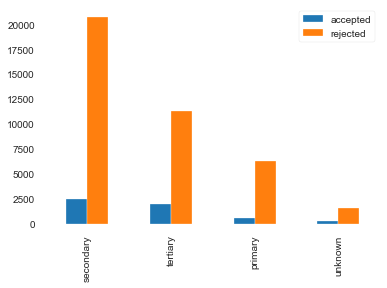

In [29]:
barGraph(bank_df, 'education','Target')

###  Less educated people seems to get convinced by campaign

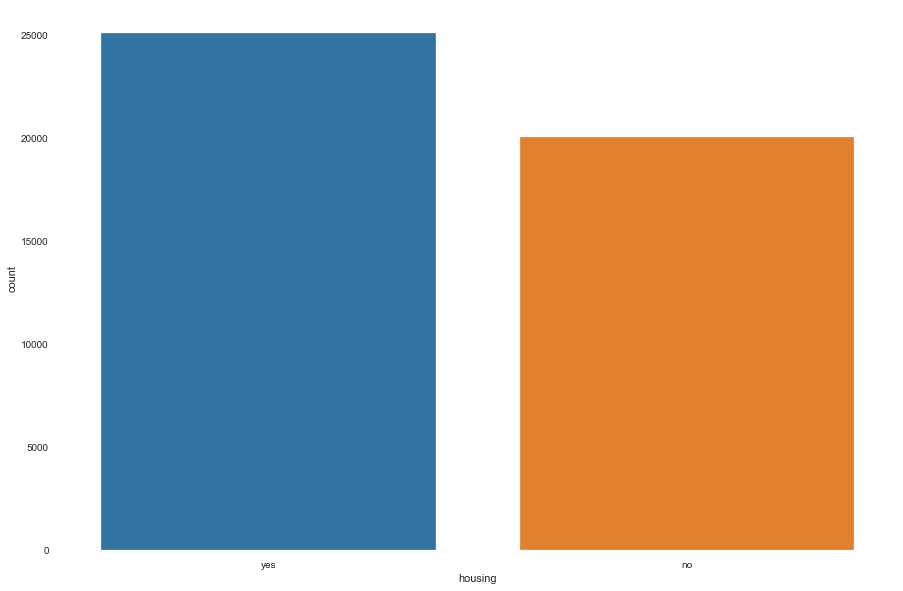

In [30]:
countplot("housing", bank_df)

### Majority of the customers have a housing loan.

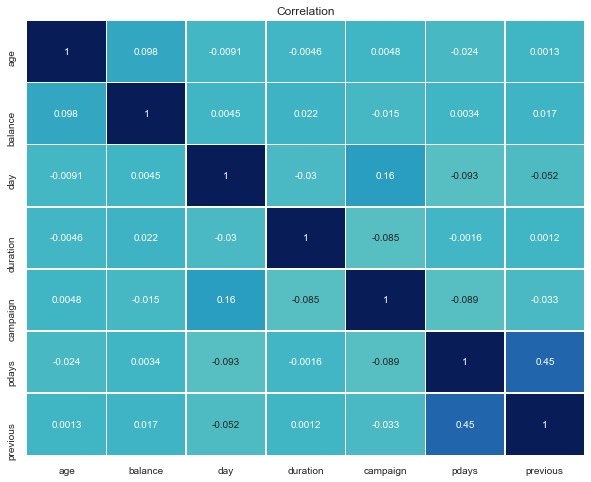

In [31]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(bank_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.title('Correlation')
plt.show()

In [32]:
bank_df.groupby(["job", "Target"])['job'].count()

job            Target
admin.         no        4540
               yes        631
blue-collar    no        9024
               yes        708
entrepreneur   no        1364
               yes        123
housemaid      no        1131
               yes        109
management     no        8157
               yes       1301
retired        no        1748
               yes        516
self-employed  no        1392
               yes        187
services       no        3785
               yes        369
student        no         669
               yes        269
technician     no        6757
               yes        840
unemployed     no        1101
               yes        202
unknown        no         254
               yes         34
Name: job, dtype: int64

## unemployed , self-employed and entrepreneur  are not much  inclined to subscribe for deposit

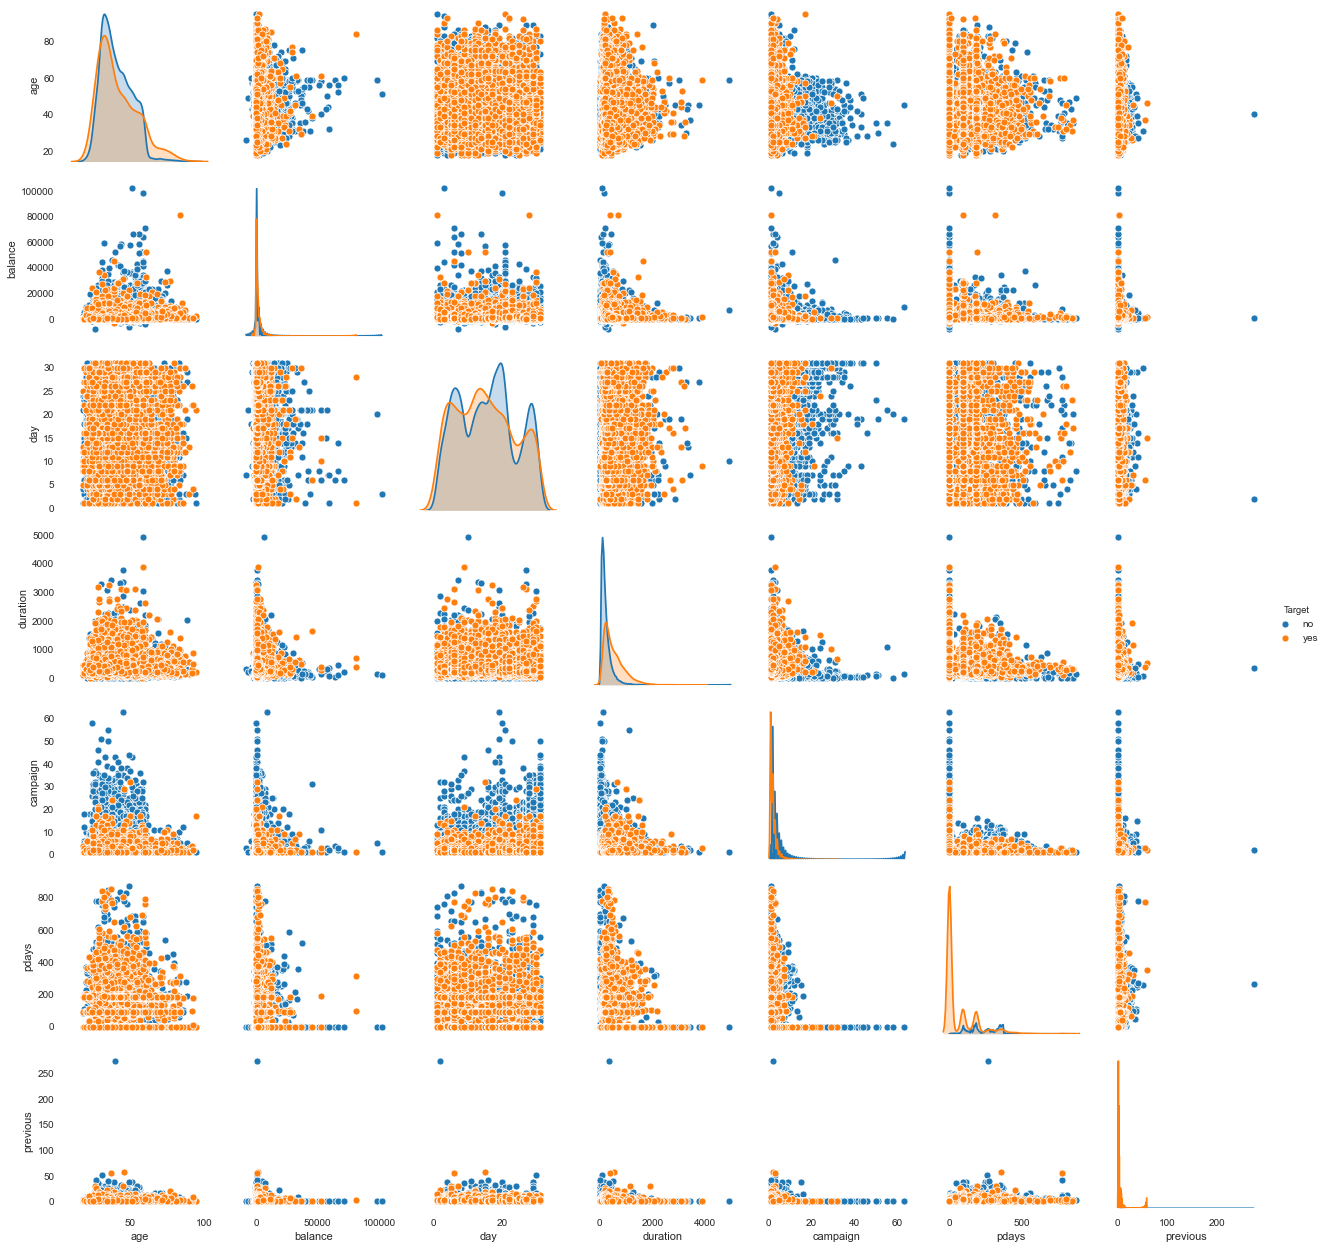

In [33]:
sns.pairplot(bank_df, hue = 'Target')

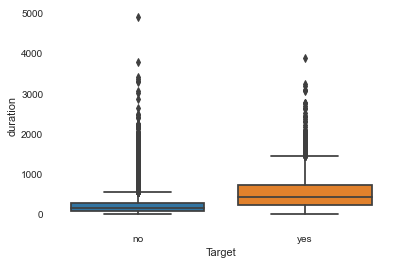

In [34]:
sns.boxplot(data=bank_df, x="Target", y="duration")
plt.show()


### Duration and Target: From the above plot it is clear that, the duration (last contact duration) of a customer can be useful for predicting the target variable. It is expected because it is already mentioned in the data overview that this field highely affects the target variable and should only be used for benchmark purposes.

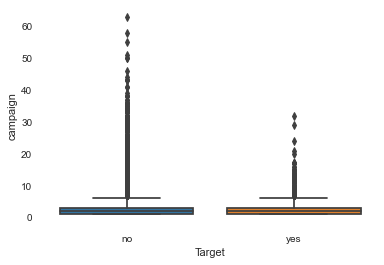

In [35]:
sns.boxplot(data=bank_df, x="Target", y="campaign")
plt.show()

In [36]:
#People who converted were exposed to fewer campaigns than others

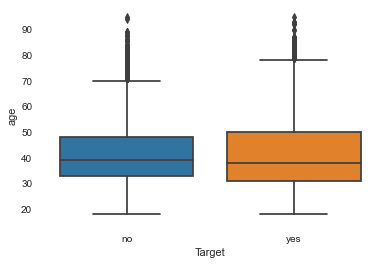

In [37]:
sns.boxplot(data=bank_df, x="Target", y="age")
plt.show()

### Age :From the above boxplot we know that for both the customers that subscibed or didn't subscribe a term deposit, has a median age of around 38-40. And the boxplot for both the classes overlap quite a lot, which means that age isn't necessarily a good indicator for which customer will subscribe and which customer will not.

In [38]:
bank_df.groupby(["campaign", "Target"])['campaign'].count()

campaign  Target
1         no        14983
          yes        2561
2         no        11104
          yes        1401
3         no         4903
                    ...  
50        no            2
51        no            1
55        no            1
58        no            1
63        no            1
Name: campaign, Length: 70, dtype: int64

### People who converted were exposed to fewer campaigns than others

In [39]:
bank_df.groupby(["education", "Target"])['education'].count()

education  Target
primary    no         6260
           yes         591
secondary  no        20752
           yes        2450
tertiary   no        11305
           yes        1996
unknown    no         1605
           yes         252
Name: education, dtype: int64

In [40]:
bank_df.groupby(["month", "Target"])['month'].count()

month  Target
apr    no         2355
       yes         577
aug    no         5559
       yes         688
dec    no          114
       yes         100
feb    no         2208
       yes         441
jan    no         1261
       yes         142
jul    no         6268
       yes         627
jun    no         4795
       yes         546
mar    no          229
       yes         248
may    no        12841
       yes         925
nov    no         3567
       yes         403
oct    no          415
       yes         323
sep    no          310
       yes         269
Name: month, dtype: int64

### Months (Seasonal effect can been seen in the data. In may the sales increases)

# Deliverable – 2 (Prepare the data for analytics) – (10)
1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30

In [41]:
#Categorize the column of dataset which is object type 
for col in bank_df.columns:
    if bank_df[col].dtype == object:
        bank_df[col] = bank_df[col].astype('category')

In [42]:
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [43]:
bank_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


## Separate inpedendent and target variables

In [44]:
# values for "Target" : yes/no
bank_df["Target_cat"] = bank_df['Target'].map({'yes':1, 'no':0})


In [45]:
data_x = bank_df.iloc[:, :-2]
print("Shape of X:", data_x.shape)
data_y = bank_df["Target_cat"]
print("Shape of Y:", data_y.shape)

Shape of X: (45211, 16)
Shape of Y: (45211,)


In [46]:
data_y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target_cat, dtype: category
Categories (2, int64): [0, 1]

## Transform the data i.e. scale / normalize if required
- Convert columns with 'yes' and 'no' values to boolean columns;
- Convert categorical columns into dummy variables.
- Remove not important columns
- Scale

In [47]:
#month can be category code values
data_x['month'] = data_x['month'].astype("category").cat.codes

In [48]:
# most of data of poutcome is unknown so it is not useful
data_x.drop('poutcome', axis=1, inplace=True)

In [49]:
# Drop 'contact', as every participant has been contacted. 
data_x.drop('contact', axis=1, inplace=True)

In [50]:
#Map padys=-1 into a large value (10000 is used) to indicate 
#that it is so far in the past that it has no effect
data_x.loc[data_x['pdays'] == -1, 'pdays'] = 10000

In [51]:
# values for "default" : yes/no
data_x['default_cat'] = data_x['default'].map( {'yes':1, 'no':0} ).astype("int")
data_x.drop('default', axis=1,inplace = True)

In [52]:
# values for "housing" : yes/no
data_x['housing_cat'] = data_x['housing'].map( {'yes':1, 'no':0} ).astype("int")
data_x.drop('housing', axis=1,inplace = True)

In [53]:
# values for "loan" : yes/no
data_x['loan_cat'] = data_x['loan'].map( {'yes':1, 'no':0} ).astype("int")
data_x.drop('loan', axis=1,inplace = True)

In [54]:
# Drop 'day' as they don't have any intrinsic meaning
data_x.drop('day', axis=1, inplace=True)

In [55]:
# Merge similar jobs into broad categories
data_x['job'] = data_x['job'].replace(['management', 'admin.'], 'white-collar')
data_x['job'] = data_x['job'].replace(['services','housemaid'], 'pink-collar')
data_x['job'] = data_x['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [56]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          45211 non-null  int64   
 1   job          45211 non-null  category
 2   marital      45211 non-null  category
 3   education    45211 non-null  category
 4   balance      45211 non-null  int64   
 5   month        45211 non-null  int8    
 6   duration     45211 non-null  int64   
 7   campaign     45211 non-null  int64   
 8   pdays        45211 non-null  int64   
 9   previous     45211 non-null  int64   
 10  default_cat  45211 non-null  int64   
 11  housing_cat  45211 non-null  int64   
 12  loan_cat     45211 non-null  int64   
dtypes: category(3), int64(9), int8(1)
memory usage: 3.3 MB


In [57]:
# Convert categorical variables to dummies
data_x = pd.get_dummies(data=data_x, columns = ['job', 'marital', 'education' ], \
                                   prefix = ['job', 'marital', 'education'])
data_x.head()

age  balance  month  duration  campaign  pdays  previous  default_cat  \
0   58     2143      8       261         1  10000         0            0   
1   44       29      8       151         1  10000         0            0   
2   33        2      8        76         1  10000         0            0   
3   47     1506      8        92         1  10000         0            0   
4   33        1      8       198         1  10000         0            0   

   housing_cat  loan_cat  ...  job_self-employed  job_pink-collar  \
0            1         0  ...                  0                0   
1            1         0  ...                  0                0   
2            1         1  ...                  0                0   
3            1         0  ...                  0                0   
4            0         0  ...                  0                0   

   job_technician  marital_divorced  marital_married  marital_single  \
0               0                 0                1               0   
1               1                 0                0               1   
2               0                 0                1               0   
3               0                 0                1               0   
4               0                 0                0               1   

   education_primary  education_secondary  education_tertiary  \
0                  0                    0                   1   
1                  0                    1                   0   
2                  0                    1                   0   
3                  0                    0                   0   
4                  0                    0                   0   

   education_unknown  
0                  0  
1                  0  
2                  0  
3                  1  
4                  1  

[5 rows x 24 columns]

In [58]:
data_x.shape

(45211, 24)

In [59]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   month                45211 non-null  int8 
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   default_cat          45211 non-null  int64
 8   housing_cat          45211 non-null  int64
 9   loan_cat             45211 non-null  int64
 10  job_blue-collar      45211 non-null  uint8
 11  job_entrepreneur     45211 non-null  uint8
 12  job_white-collar     45211 non-null  uint8
 13  job_other            45211 non-null  uint8
 14  job_self-employed    45211 non-null  uint8
 15  job_pink-collar      45211 non-null  uint8
 16  job_technician       4

In [60]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=.3, random_state=22)
X_train.shape, X_test.shape

((31647, 24), (13564, 24))

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

In [62]:
X_train.shape, X_test.shape

((31647, 24), (13564, 24))

# Deliverable – 3 (create the ensemble model) – (30)

1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)

In [63]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [64]:

results_df = pd.DataFrame()
## function to get confusion matrix in a proper format
def print_metrics(results_df, testName, reg, actual, predicted ):
    tr_acc=reg.score(X_train,y_train)
    tst_acc=reg.score(X_test, y_test)
    rc_scr = recall_score(actual,predicted);
    pr_scr = precision_score(actual,predicted);
    f1_scr= f1_score(actual,predicted)
    roc_scr = roc_auc_score(actual,predicted);
    print("Training accuracy",tr_acc)  
    print()
    print("Testing accuracy",tst_acc)
    print()
    print('Confusion Matrix')
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()
    print()
    print("Recall:",rc_scr)
    print()  
    print("Precision:",pr_scr)
    print()
    print("F1 Score:",f1_scr)
    print()
    print("Roc Auc Score:",roc_scr)
    
    resultMap= {'1_TestName' : testName,'TrainingAccuracy' : tr_acc,
            'TestingAccuracy' : tst_acc,'RecallScore': rc_scr,'PrecisionScore': pr_scr,'F1Score':f1_scr,
            'ROCScore':roc_scr}
    results_df=results_df.append(resultMap,ignore_index=True)
    return results_df;

## LogisticRegression

Training accuracy 0.8931968275033968

Testing accuracy 0.8918460631082277

Confusion Matrix


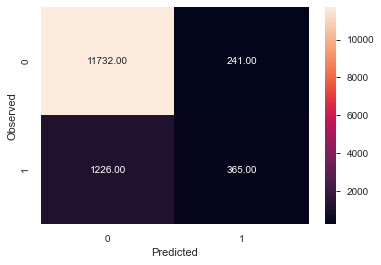


Recall: 0.22941546197360152

Precision: 0.6023102310231023

F1 Score: 0.33227127901684117

Roc Auc Score: 0.6046434196195578


In [65]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


results_df= print_metrics(results_df,"LogisticRegression",logreg, y_test,y_pred)


In [66]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
recall_score_list=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    recall_score_list.append(round(recall_score(y_test,y_predict),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)
print()
print(recall_score_list)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.893, 0.893, 0.893, 0.893, 0.893]

[0.892, 0.892, 0.892, 0.892, 0.892]

[0.229, 0.229, 0.229, 0.229, 0.229]


### recalls and other metrics are simillar . going to use default


## Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
#Using default 'gini' criteria to split. Other option include 'entropy'.
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)
y_pred = dTree.predict(X_test)

Training accuracy 1.0

Testing accuracy 0.8586700088469478

Confusion Matrix


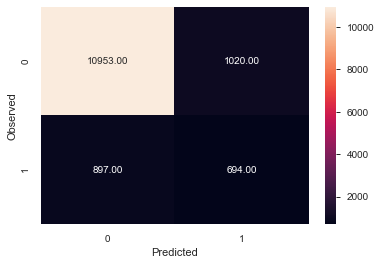


Recall: 0.43620364550597107

Precision: 0.4049008168028005

F1 Score: 0.41996974281391836

Roc Auc Score: 0.6755059821115422


In [69]:
results_df= print_metrics(results_df,"DecisionTreeClassifier",dTree, y_test,y_pred)

### 2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)

#### Ensemble Learning - Bagging

Training accuracy 0.999431225708598

Testing accuracy 0.8874963137717488

Confusion Matrix


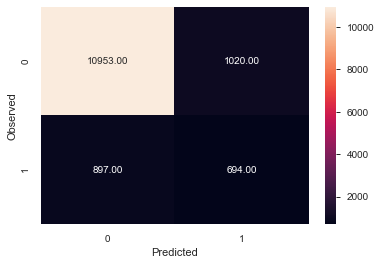


Recall: 0.43620364550597107

Precision: 0.4049008168028005

F1 Score: 0.41996974281391836

Roc Auc Score: 0.6755059821115422


In [70]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

y_predict = bgcl.predict(X_test)

results_df= print_metrics(results_df, "BaggingClassifier",bgcl, y_test,y_pred)



### Ensemble Learning - AdaBoosting

In [71]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)
y_predict = abcl.predict(X_test)

Training accuracy 0.8837488545517742

Testing accuracy 0.8829253907401946

Confusion Matrix


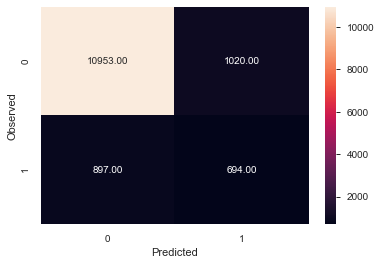


Recall: 0.43620364550597107

Precision: 0.4049008168028005

F1 Score: 0.41996974281391836

Roc Auc Score: 0.6755059821115422


In [72]:
results_df= print_metrics(results_df,"AdaBoostClassifier",abcl, y_test,y_pred)

### Ensemble Learning - GradientBoost

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)
y_predict = gbcl.predict(X_test)

Training accuracy 0.900464499004645

Testing accuracy 0.8951636685343557

Confusion Matrix


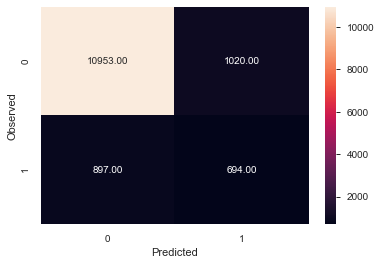


Recall: 0.43620364550597107

Precision: 0.4049008168028005

F1 Score: 0.41996974281391836

Roc Auc Score: 0.6755059821115422


In [74]:
results_df= print_metrics(results_df,"GradientBoostingClassifier",gbcl, y_test,y_pred)

### Ensemble RandomForest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)
y_predict = rfcl.predict(X_test)

Training accuracy 0.9996208171390654

Testing accuracy 0.8925095841934533

Confusion Matrix


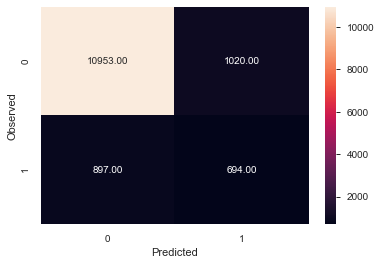


Recall: 0.43620364550597107

Precision: 0.4049008168028005

F1 Score: 0.41996974281391836

Roc Auc Score: 0.6755059821115422


In [76]:
results_df= print_metrics(results_df,"RandomForestClassifier",rfcl, y_test,y_pred)

### 3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)

In [77]:
results_df.T

0                       1  \
1_TestName        LogisticRegression  DecisionTreeClassifier   
F1Score                         0.33                    0.42   
PrecisionScore                  0.60                    0.40   
ROCScore                        0.60                    0.68   
RecallScore                     0.23                    0.44   
TestingAccuracy                 0.89                    0.86   
TrainingAccuracy                0.89                    1.00   

                                  2                   3  \
1_TestName        BaggingClassifier  AdaBoostClassifier   
F1Score                        0.42                0.42   
PrecisionScore                 0.40                0.40   
ROCScore                       0.68                0.68   
RecallScore                    0.44                0.44   
TestingAccuracy                0.89                0.88   
TrainingAccuracy               1.00                0.88   

                                           4                       5  
1_TestName        GradientBoostingClassifier  RandomForestClassifier  
F1Score                                 0.42                    0.42  
PrecisionScore                          0.40                    0.40  
ROCScore                                0.68                    0.68  
RecallScore                             0.44                    0.44  
TestingAccuracy                         0.90                    0.89  
TrainingAccuracy                        0.90                    1.00


The campaign's goal is to have more people to subscribe term deposit i.e. less number of False Negative, so it don't lose customers who want to subscribe term deposit.

Types of error:

- Type I error — False postives : Predicted that Customer has subscribed term deposit but actually customer has not.
- Type II error — False negatives : Predicted that Customer has not subscribed term deposit but actually customer has.

In this use case, we need to reduce Type II error to not lose the people who would  subscribe term deposits. Hence, Recall is MORE important then precision for our usecase.



 Based on above metrics of various algorithms,   
 1. LogisticRegression,BaggingClassifier, GradientBoostingClassifier , RandomForestClassifier have comparable  accuracy of ~90 %
 2. LogisticRegression is simplest and fastest but recall is better for GradientBoostingClassifier and RandomForestClassifier of 0.42.
 3. Among RandomForestClassifier and GradientBoostingClassifier , we can pick either as they have comparable metrtics with GradientBoostingClassifier little better on accuracy.
 